# Logistic regression via stochastic gradient ascent

We want to maximize the log-likelihood for a Bernoulli random variable $y \in \{0, 1\}$ with $m$ independent observations, $l(\theta) = \sum_{i=1}^m y^{(i)} log (h_\theta(x^{(i)}) + (1 - y^{(i)}) log(1 - h_\theta(x^{(i)}))$. 

The updates will be $\theta := \theta + \alpha \nabla_\theta l(\theta)$, where $\dfrac{\partial}{\partial \theta_j} l(\theta) = (y - h_\theta(x^{(i)})) x_j^{(i)}$, each update is made based on one training example in sequence (though the training set may be looped over), and the learning rate $\alpha$ decreases as the algorithm proceeds.

In [257]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import logistic
plt.style.use('ggplot')

def inv_logit(p):
        return 1. / (1. + np.exp(-p))

def sim_reg(m, n):
    intercept = np.repeat(1, m)
    if n > 1:
        x = np.random.rand(m, n - 1)
        X = np.column_stack((intercept, x))
    else:
        X = intercept
    beta = np.random.normal(0, 2, n)
    h_theta = inv_logit(np.dot(X, beta))
    y = np.random.binomial(1, h_theta, m)
    return {'beta':beta, 'y':y, 'X':X}

n = 2
m = 1000

out = sim_reg(m, n)

In [258]:
def calc_gradient(y, X, theta, i, j):
    h = inv_logit(np.dot(np.transpose(theta), X[i, :]))
    return (y[i] - h) * X[i, j]

def update_theta(theta, alpha, y, X, i):
    # calc gradient
    grad = np.empty(len(theta))
    for j in range(0, len(theta)):
        grad[j] = calc_gradient(y, X, theta, i, j)
    new_theta = theta + alpha * grad
    return new_theta

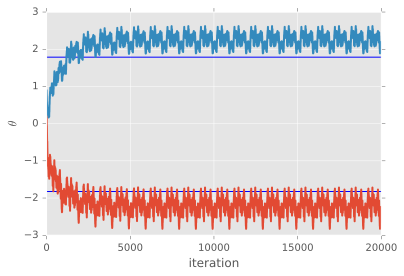

In [259]:
# set up object to track theta updates
reps = 20
iters = m * reps

theta_out = np.empty([iters, n])
theta_out[0, :] = np.random.normal(0, 1, n)

# indices to cycle through
indx = np.arange(m)
indx =  np.tile(indx, reps)

for i in range(1, iters):
    theta_out[i, :] = update_theta(theta_out[i-1, :], .1, 
                                   out['y'], out['X'], indx[i])


for i in range(0, n):
    plt.axhline(out['beta'][i])
    plt.plot(range(0, iters), theta_out[:, i], lw=2)
    plt.xlabel('iteration')
    plt.ylabel(r'$\theta$')

That's not working well, because the learning rate is not decreasing with time. Although $\theta$ makes it to the neighborhood of the true parameter, it doesn't stop oscillating. [It seems based on this paper that](http://cilvr.cs.nyu.edu/diglib/lsml/bottou-sgd-tricks-2012.pdf) we want to have something more like $\alpha_t = \alpha_0 (1 + \alpha_0 \lambda t)^{-1}$. 

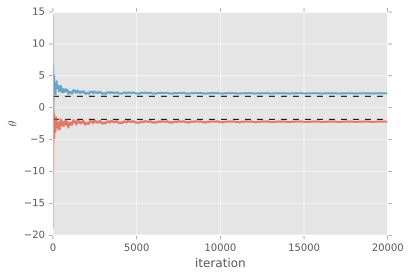

In [260]:
alpha0 = 40
lamb = .01

for i in range(1, iters):
    alpha = alpha0 * (1 + alpha0 * lamb * i) ** -1
    theta_out[i, :] = update_theta(theta_out[i-1, :], alpha, 
                                   out['y'], out['X'], indx[i])
    
for i in range(0, n):
    plt.axhline(out['beta'][i], color='black', ls='--')
    plt.plot(range(0, iters), theta_out[:, i], lw=2, alpha=.7)
    plt.xlabel('iteration')
    plt.ylabel(r'$\theta$')